# Reto - Titanic: Machine Learning from Disaster

---

### Lautaro Gabriel Coteja - A01571214
### Daniela Jiménez Téllez - A01654798
### Andrés Villarreal González - A00833915
### Héctor Hibran Tapia Fernández - A01661114

---

Link del repositorio:

https://github.com/Lautaro000/Inteligencia-Artificial-Avanzada-para-la-Ciencia-de-Datos-I

---

### Importamos librerias

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

### Importamos dataset (train)

In [75]:
df = pd.read_csv('./datasets/train.csv')
pd.reset_option('display.max_rows')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Recordamos que se descompone de la siguiente forma el dataset:

- train: Contiene las 12 columnas del dataset, solo tenemos del pasajero 1 al 891.
- test: Contiene 11 columnas del dataset, se quitó "Survived", tenemos del pasajero 892 al 1309.
- gender_submission: Contiene la columna "Survived" del test, con los mismos pasarejos, se usará como comparación de respuesta al finalizar el modelo.

### Documentación

| Variable  | Definición                              | Clave                                                  |
|-----------|-----------------------------------------|--------------------------------------------------------|
| survival  | Supervivencia                           | 0 = No, 1 = Sí                                         |
| pclass    | Clase de ticket                         | 1 = 1ª, 2 = 2ª, 3 = 3ª                                 |
| sex       | Sexo                                    |                                                        |
| Age       | Edad en años                            |                                                        |
| sibsp     | Nº de hermanos / cónyuges a bordo       |                                                        |
| parch     | Nº de padres / hijos a bordo            |                                                        |
| ticket    | Número de ticket                        |                                                        |
| fare      | Tarifa del pasajero                     |                                                        |
| cabin     | Número de camarote                      |                                                        |
| embarked  | Puerto de embarque                      | C = Cherburgo, Q = Queenstown, S = Southampton         |

**Notas sobre las variables:**
- **pclass:** Un indicador de estatus socioeconómico (SES)
  - 1ª = Alta
  - 2ª = Media
  - 3ª = Baja
- **edad:** La edad es fraccionaria si es menor de 1. Si la edad es estimada, se presenta en la forma xx.5
- **sibsp:** El conjunto de datos define las relaciones familiares de la siguiente manera:
  - Hermano/a = hermano, hermana, hermanastro/a
  - Cónyuge = esposo, esposa (se ignoran amantes y prometidos)
- **parch:** El conjunto de datos define las relaciones familiares de la siguiente manera:
  - Padre/madre = madre, padre
  - Hijo/a = hija, hijo, hijastra/o
  - Algunos niños viajaban solo con una niñera, por lo que parch=0 para ellos.

In [76]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Procesamientos de Datos

---


In [77]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Aquí "Cabin," está sospechoso como llenarlo, por ahora no la borraremos, pero la tendremos sí es necesario borrarla en el futuro.

### Vamos a hacer experimentos...



In [78]:
from sklearn.impute import KNNImputer

df_master = df[df['Name'].str.contains('Master.')]
age_values = df_master[['Age']]

imputer = KNNImputer(n_neighbors = 5)
imputed_ages = imputer.fit_transform(age_values)

df.loc[df_master.index, 'Age'] = imputed_ages

df_non_master = df[~df['Name'].str.contains('Master.')]
age_values_non_master = df_non_master[['Age']]
imputed_ages_non_master = imputer.fit_transform(age_values_non_master)
df.loc[df_non_master.index, 'Age'] = imputed_ages_non_master

In [79]:
pd.set_option('display.max_rows', None)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,31.033186,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [80]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [81]:
from sklearn.preprocessing import OneHotEncoder

def transform_dataframe(df):
    encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')

    matrix = encoder.fit_transform(df[['Embarked']])
    column_names = ["C", "Q", "S"] 

    for i in range(len(matrix.T)):
        df[column_names[i]] = matrix.T[i]

    matrix = encoder.fit_transform(df[['Sex']])
    column_names = ["Female", "Male"]

    for i in range(len(matrix.T)):
        df[column_names[i]] = matrix.T[i]

    return df

In [82]:
pd.reset_option('display.max_rows')
transform_dataframe(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,Female,Male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S,0.0,0.0,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1.0,0.0,0.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0.0,0.0,1.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0.0,0.0,1.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S,0.0,0.0,1.0,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0.0,0.0,1.0,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,31.033186,1,2,W./C. 6607,23.4500,B96 B98,S,0.0,0.0,1.0,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1.0,0.0,0.0,0.0,1.0


In [83]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
C              0
Q              0
S              0
Female         0
Male           0
dtype: int64

Ya que tenemos 0 valores nulos, podemos iniciar con el análisis.

## Análisis de Datos

---


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  C            891 non-null    float64
 13  Q            891 non-null    float64
 14  S            891 non-null    float64
 15  Female       891 non-null    float64
 16  Male         891 non-null    float64
dtypes: float64(7), int64(5), object(5)
memory usage: 118.5+ KB


In [85]:
df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,Female,Male
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891,891.000000,891.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,691,646,NaN,NaN,NaN,NaN,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.845351,0.523008,0.381594,NaN,32.204208,NaN,NaN,0.188552,0.086420,0.725028,0.352413,0.647587
std,257.353842,0.486592,0.836071,NaN,NaN,13.123036,1.102743,0.806057,NaN,49.693429,NaN,NaN,0.391372,0.281141,0.446751,0.477990,0.477990
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,31.033186,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000,0.000000,1.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,0.000000,0.000000,1.000000,1.000000,1.000000


In [86]:
fig = px.histogram(df, x = "Survived", color = "Sex", barmode = "group", text_auto = True)
fig.update_xaxes(tickvals = [0, 1], ticktext = ['Not Survived', 'Survived'])
fig.update_layout(title_text = 'Sobrevivientes por Sexo', title_x = 0.5)
fig.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [87]:
fig = px.histogram(df, x = "Fare", color = "Survived", marginal = "box", nbins = 50, title = "Distribución de tarifas por sobrevivencia")
fig.update_layout(title_x = 0.5)
fig.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [88]:
fig = px.histogram(df, x = "Age", color = "Survived", marginal = "box", nbins = 50)
fig.update_layout(title_text = 'Distribución de las Edades', title_x = 0.5)
fig.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [89]:
pclass_counts = df['Pclass'].value_counts().sort_index()

fig = go.Figure(data = [go.Bar(
    x = pclass_counts.index,
    y = pclass_counts.values,
    text = pclass_counts.values,
    textposition = 'outside',
    marker_color = ['#4c72b0', '#55a868', '#c44e52'] 
)])

fig.update_layout(
    title = 'Cantidad de Personas por Clase',
    xaxis_title = 'Pclass',
    yaxis_title = 'Count',
    xaxis = dict(tickmode = 'linear'),
    yaxis = dict(range = [0, 520]), 
    bargap = 0.2,
    width = 1000,
    height = 500
)

fig.show()

In [90]:
fig = px.histogram(df, x = 'Pclass', color = 'Sex', barmode = 'group', text_auto = True, title = 'Cantidad de Mujeres y Hombres por Clase')
fig.update_layout(width = 1000, height = 500)
fig.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [91]:
df_count = df.groupby(['Survived', 'Pclass']).size().reset_index(name = 'count')

fig = go.Figure()

for pclass in sorted(df['Pclass'].unique()):
    filtered_df = df_count[df_count['Pclass'] == pclass]
    fig.add_trace(go.Bar(
        x = filtered_df['Survived'],
        y = filtered_df['count'],
        name = str(pclass),
        text = filtered_df['count'],
        textposition = 'outside'
    ))

fig.update_xaxes(type = 'category', tickvals = [0, 1], ticktext = ['No Sobrevivido', 'Sobrevivido'])
fig.update_layout(
    title_text = 'Sobrevivientes por Clase',
    xaxis_title = 'Estado de Sobrevivencia',
    barmode ='group'
)

fig.show()

In [92]:
df['Título'] = df['Name'].str.extract(r'([A-Za-z]+)\.')
title_counts = df['Título'].value_counts().reset_index()
title_counts.columns = ['Título', 'Count']

fig = px.bar(title_counts, y = 'Título', x = 'Count', orientation = 'h', title = 'Cantidad de Personas por Título', labels = {'Count': 'Cantidad', 'Título': 'Título'})
fig.update_traces(texttemplate = '%{x}', textposition = 'outside')
fig.show()

In [93]:
average_age_per_title = df.groupby('Título')['Age'].mean().dropna()
average_age_per_title = average_age_per_title.sort_values(ascending = False)

fig = px.bar(
    average_age_per_title,
    orientation = 'h',
    x = average_age_per_title.values,
    y = average_age_per_title.index,
    labels = {'x': 'Edad Promedio', 'index': 'Título'},
    title = 'Edad Promedio por Título'
)

fig.update_traces(texttemplate = '%{x:.2f}', textposition = 'inside')
fig.show()

### Dropeamos variables que no necesitamos


In [94]:
df = df.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Cabin', 'Título'], axis = 1)

In [95]:
df.head(40)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
5,6,0,3,31.033186,0,0,8.4583,0.0,1.0,0.0,0.0,1.0
6,7,0,1,54.000000,0,0,51.8625,0.0,0.0,1.0,0.0,1.0
7,8,0,3,2.000000,3,1,21.0750,0.0,0.0,1.0,0.0,1.0
8,9,1,3,27.000000,0,2,11.1333,0.0,0.0,1.0,1.0,0.0
9,10,1,2,14.000000,1,0,30.0708,1.0,0.0,0.0,1.0,0.0


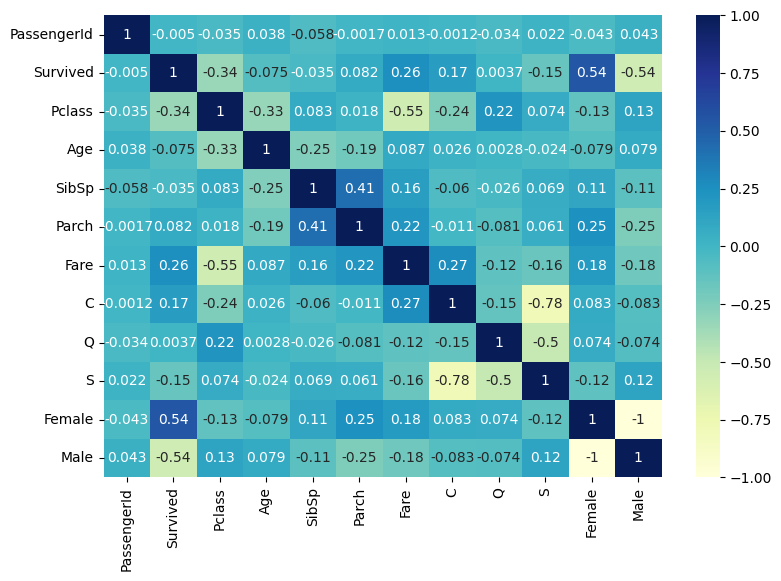

In [96]:
df_numeric = df.select_dtypes(include = ['number'])
corr = df_numeric.corr()
plt.figure(figsize = (9, 6))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.show()

In [97]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'C', 'Q', 'S', 'Female', 'Male'],
      dtype='object')

## Modelos Predictivos

---


## Regresión Logística

In [98]:
X = df.drop('Survived', axis = 1).values  
y = df['Survived'].values

X = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.zeros(X.shape[1])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (1/m) * (-y @ np.log(h) - (1 - y) @ np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        h = sigmoid(X @ theta)
        theta -= (alpha/m) * (X.T @ (h - y))
        cost_history.append(compute_cost(X, y, theta))
    
    return theta, cost_history

alpha = 0.000033
num_iterations = 100000

theta, cost_history = gradient_descent(X, y, theta, alpha, num_iterations)

print("Parámetros finales (theta):", theta)
print("Costo final:", cost_history[-1])

Parámetros finales (theta): [ 7.48124035e-03  2.76588632e-04 -1.90155844e-01 -1.50083436e-02
 -1.32574437e-01  2.41718010e-04  1.33276078e-02  4.66880309e-02
  1.80729061e-02 -5.72796967e-02  3.13599398e-01 -3.06118158e-01]
Costo final: 0.5436416977107267


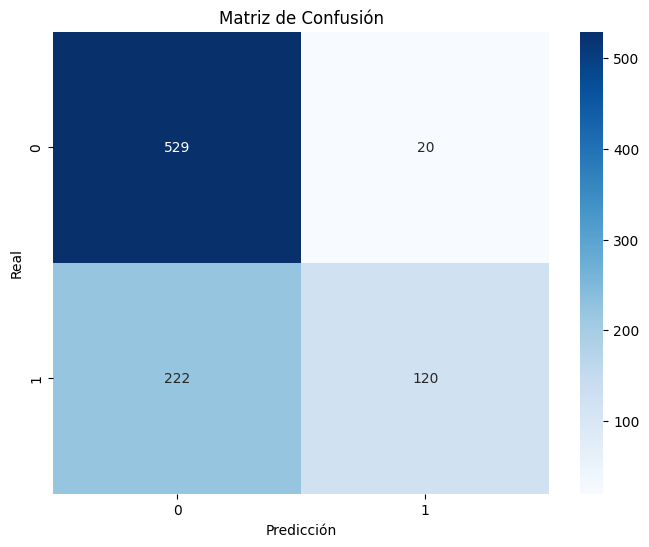

In [99]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

predictions = sigmoid(X @ theta) >= 0.5

cm = confusion_matrix(y, predictions)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

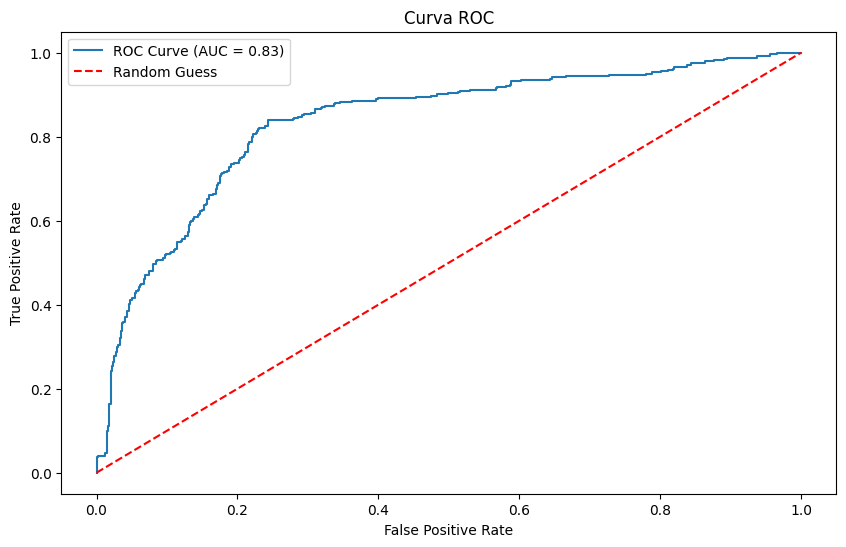

In [100]:
fpr, tpr, thresholds = roc_curve(y, sigmoid(X @ theta))
roc_auc = roc_auc_score(y, sigmoid(X @ theta))

plt.figure(figsize = (10, 6))
plt.plot(fpr, tpr, label = f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'r', label = 'Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

## Procesamiento de datos con "test.csv"

---

In [101]:
test_df = pd.read_csv('./datasets/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [102]:
from sklearn.impute import KNNImputer

df_master = test_df[test_df['Name'].str.contains('Master.')]
age_values = df_master[['Age']]

imputer = KNNImputer(n_neighbors = 5)
imputed_ages = imputer.fit_transform(age_values)

test_df.loc[df_master.index, 'Age'] = imputed_ages

df_non_master = test_df[~test_df['Name'].str.contains('Master.')]
age_values_non_master = df_non_master[['Age']]
imputed_ages_non_master = imputer.fit_transform(age_values_non_master)
test_df.loc[df_non_master.index, 'Age'] = imputed_ages_non_master

In [103]:
test_df['Cabin'] = test_df['Cabin'].fillna(test_df['Cabin'].mode()[0])
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [104]:
pd.reset_option('display.max_rows')
transform_dataframe(test_df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,Female,Male
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,B57 B59 B63 B66,Q,0.0,1.0,0.0,0.0,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,B57 B59 B63 B66,S,0.0,0.0,1.0,1.0,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,B57 B59 B63 B66,Q,0.0,1.0,0.0,0.0,1.0
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,B57 B59 B63 B66,S,0.0,0.0,1.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,B57 B59 B63 B66,S,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,31.506635,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S,0.0,0.0,1.0,0.0,1.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,1.0,0.0,0.0,1.0,0.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S,0.0,0.0,1.0,0.0,1.0
416,1308,3,"Ware, Mr. Frederick",male,31.506635,0,0,359309,8.0500,B57 B59 B63 B66,S,0.0,0.0,1.0,0.0,1.0


In [105]:
test_df = test_df.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [106]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S',
       'Female', 'Male'],
      dtype='object')

## Corremos el modelo pero ahora con "test.csv" 

In [107]:
X_test = test_df.values
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

def predict(X, theta):
    probabilities = sigmoid(X @ theta)
    return (probabilities >= 0.5).astype(int)

predictions = predict(X_test, theta)

test_df['Survived'] = predictions

## Comparamos resultados con gender_submission.csv

In [108]:
gender_submission_df = pd.read_csv('./datasets/gender_submission.csv')
results_df = test_df[['PassengerId', 'Survived']].merge(gender_submission_df, on = 'PassengerId', how = 'left', suffixes = ('_pred', '_real'))

accuracy = (results_df['Survived_pred'] == results_df['Survived_real']).mean()
print(f"Precisión del modelo en el conjunto de test: {accuracy:.4f}")

Precisión del modelo en el conjunto de test: 0.7488


In [109]:
correct_predictions = (results_df['Survived_pred'] == results_df['Survived_real']).sum()
total_predictions = len(results_df)

print(f"Predicciones correctas: {correct_predictions}/{total_predictions}")

Predicciones correctas: 313/418


In [110]:
results_df.head(10)

,PassengerId,Survived_pred,Survived_real
0,892,0,0
1,893,0,1
2,894,0,0
3,895,0,0
4,896,0,1
5,897,0,0
6,898,0,1
7,899,0,0
8,900,0,1
9,901,0,0


## Referencias

---

https://www.kaggle.com/code/abhinavatall/titanic-dataset-top-3-accuracy-with-ensambling